In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
def percola_original(N, p):
  def horizontal(x, i):
    return x[i]
  def vertical(x, j):
    h = []
    for k in range(N):
      h.append(int(x[k][j-1]))
    return h
  def percola_linha(x, i):
    if x[i][0] == 1:
      if np.sum(horizontal(x, i)) == N:
        return i+1
  x = np.random.rand(N, N) < p
  x = np.where(x, 1, 0)
  print(x)
  # conferir se percola na horizontal
  for i in range(N):
      if percola_linha(x, i) != None:
        return True, f'Linha {percola_linha(x, i)}'
  # conferir se percola na vertical
  for j in range(N):
    if x[0][j] == 1:
      if np.sum(vertical(x, j+1)) == N:
        return True, f'Coluna {j+1}'
  # caso não percole, retorna 0
  return False, f'não percola'

percola_original(10, 0.8)

[[1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 0 1 1 1 1 0]
 [1 0 1 1 1 0 1 1 1 1]
 [1 1 0 1 1 0 1 1 1 1]
 [0 1 1 1 1 0 1 1 1 1]
 [0 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 0 1 0 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 0 1 1]
 [1 1 1 1 0 0 1 1 1 1]]


(True, 'Linha 1')

In [14]:
# VERSÃO SEM PRINTAR AS MATRIZES

def percola(N, p):
  def horizontal(x, i):
    return x[i]
  def vertical(x, j):
    h = []
    for k in range(N):
      h.append(int(x[k][j-1]))
    return h
  def percola_linha(x, i):
    if x[i][0] == 1:
      if np.sum(horizontal(x, i)) == N:
        return i+1
  x = np.random.rand(N, N) < p
  x = np.where(x, 1, 0)
  # conferir se percola na horizontal
  for i in range(N):
      if percola_linha(x, i) != None:
        return True, f'Linha {percola_linha(x, i)}'
  # conferir se percola na vertical
  for j in range(N):
    if x[0][j] == 1:
      if np.sum(vertical(x, j+1)) == N:
        return True, f'Coluna {j+1}'
  # caso não percole, retorna 0
  return False, f'não percola'

percola(10, 0.8)

(True, 'Linha 1')

In [7]:
def prob_percolacao(N, p, n):
  sim = 0
  for i in range(n):
    if percola(N, p)[0] == True:
      sim += 1
  return sim/n

prob_percolacao(512, 0.99, 500)

0.998

In [ ]:
# Versão 2.0 

# Nessa versão, ao invés de somarmos os itens da linha para verificar se percola, vamos conferindo o valor um por um dos elementos da linha/coluna vigente
# Com isso, será possível:
# 1) diminuir o número de iterações para verificar se a matriz percola
# 2) contabilizar o número de elementos do maior cluster, caso não percole

def percola_original(N, p):
  # gerar a matriz
  x = np.random.rand(N, N) < p
  x = np.where(x, 1, 0)
  print(x)
  # conferir se percola na horizontal + esquerda para direita
  maior_cluster_linha, i, linha = 0, 0, 0
  while i < N:
    k, confere = 0, 0
    while k < N and x[i][k] == 1:
        confere += 1
        k += 1
    if confere == N:
        return True, f'Percola na linha {i+1}'
    elif confere > maior_cluster_linha:
        maior_cluster_linha = confere
        linha = i + 1
    i += 1

  '''NicoNota: pra que a variável 'k' aqui?? Não podemos substituir o 'k' pelo 'confere'? '''

  # conferir se percola na vertical
  maior_cluster_coluna, j, coluna = 0, 0, 0
  while j < N:
    k, confere = 0, 0
    while k < N and x[k][j] == 1:
        confere += 1
        k += 1
    if confere == N:
        return True, f'Percola na coluna {j+1}'
    elif confere > maior_cluster_coluna:
        maior_cluster_coluna = confere
        coluna = j + 1
    j += 1
  # verificar se há cluster maior da direita para a esquerda
  i = 0
  while i < N:
    k, confere = N-1, 0
    while k >= 0 and x[i][k] == 1:
      confere += 1
      k -= 1
      if confere > maior_cluster_linha:
        maior_cluster_linha = confere
        linha = i + 1
    i += 1
    # verificar se há cluster maior de baixo para cima
  j = 0
  while j < N:
    k, confere = N-1, 0
    while k >= 0 and x[k][j] == 1:
      confere += 1
      k -= 1
      if confere > maior_cluster_coluna:
        maior_cluster_coluna = confere
        coluna = j + 1
    j += 1   
    # ver qual cluster é maior
  r = [f'{maior_cluster_linha} na linha {linha}' if maior_cluster_linha >= maior_cluster_coluna else f'{maior_cluster_coluna} na coluna {coluna}']
  # caso não percole, retorna 0
  return False, f'não percola e o maior cluster é {r}'

percola_original(6, 0.5)

[[1 1 1 1 1 0]
 [1 1 0 1 0 1]
 [1 1 0 0 1 1]
 [0 0 1 1 0 1]
 [1 1 1 1 0 0]
 [1 0 0 0 0 0]]


(False, 'não percola e o maior cluster é', ['5 na linha 1'])

In [21]:
# Função que calcula tanto a probabilidade de percolação dado N, p e n quanto a média do maior cluster
def prob_percolacao_e_media_cluster(N, p, n):
  valores_cluster = []
  per, soma, nao_percola = 0, 0, 0
  for i in range(n):
    y = percola_original(N, p)
    if y[0] == True:
      per += 1
    else:
      nao_percola += 1
      soma += y[2]
      valores_cluster.append(y[2])
  if nao_percola == 0:
    media = 0
  else:
    media = soma/nao_percola
  plt.figure(figsize=(8,8))
  plt.hist(valores_cluster, align='left', edgecolor='black', bins=15, density=True)
  plt.suptitle('Distribuição dos clusters nos casos em que não houve percolação', size=20)
  plt.title(f'Probabilidade de percolação: {per/n} ; Média do tamanho dos clusters formados: {media:.2f}')
  plt.xlabel('Sítios conectados')
  plt.ylabel('Frequência')
  plt.grid(True)
  plt.show()
  return per/n, f'{media:.2f}'

prob_percolacao_e_media_cluster(64, 0.9, 10000)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 0 1 1]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


TypeError: unsupported operand type(s) for +=: 'int' and 'list'

Random walk

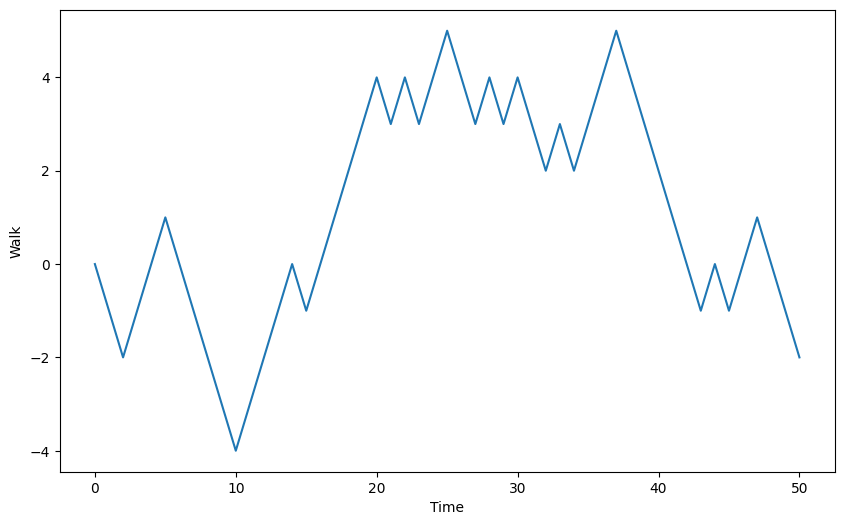

In [ ]:
def randomwalk(x, time):
    Ts = [0] # Time step
    X = [0] # Soma dos passos
    for ts in range(1, time+1):
        Ts.append(ts)
        rand = random.choice(x)
        step = X[ts-1] + rand
        # step = posição no tempo anterior + escolha aleatória
        X.append(step)
    plt.figure(figsize=(10,6))
    plt.plot(Ts, X)
    plt.xlabel('Time')
    plt.ylabel('Walk')
    plt.show

randomwalk([-1, 1], 50)

In [ ]:
n = 5
p = 0.7
m = np.random.rand(n, n) < p

for i in m:
    k = 0
    linha = np.array()
    for k in range(n):
        if i[k] == 1:
            linha.append('sim')
        else:
            linha.append('não')
        
    